## 단순회귀분석

In [1]:
# step1 - 데이터 준비
import pandas as pd
import seaborn as sns

df = sns.load_dataset('mpg')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# step2 - 데이터 탐색 : 데이터의 기본적인 정보를 확인

# 데이터 자료형 확인
print(df.info())
print("\n")

# 데이터 통계 요약 정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000

In [4]:
# 누락 데이터 확인 후  제거

print(df.isnull().sum())

# 누락 데이터가 있는 행 제거
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
print("\n")

print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [7]:
# step3 - 속성 선택 : 단순회귀분석에 변수에 사용할 후보 열을 선택

# 예측목표(종속 변수) : mpg
# 독립변수 : cylinders, horsepower, weight
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


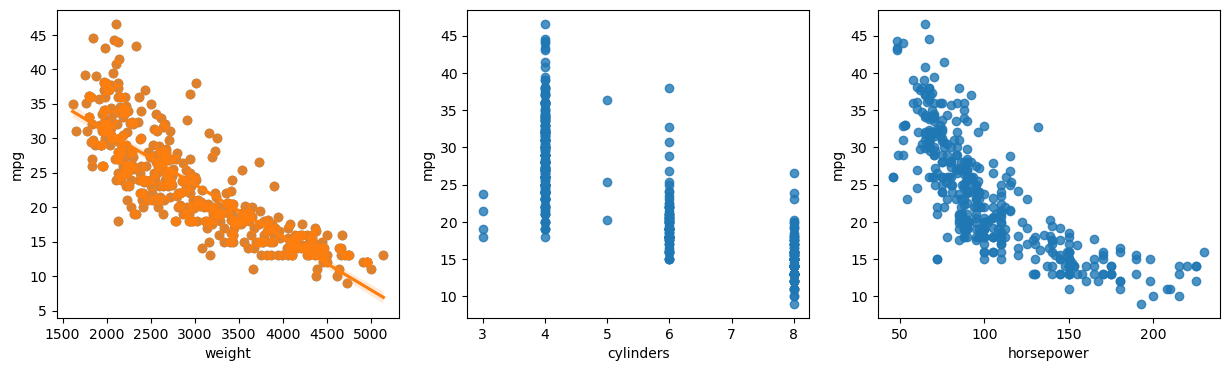

In [10]:
# 3개의 후보 열 중 단순회귀 분석에 사용할 독립 변수 선택
# 종속변수와 독립변수가 선형 관계를 가지는 경우 찾기(그래프로 확인)

import seaborn as sns
import matplotlib.pyplot as plt

# seaborn 산점도 그래프
fig = plt.figure(figsize = (15, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax1, fit_reg = False) # 회귀선 미표시
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax1, fit_reg = True) # 회귀선 표시
sns.regplot(x = 'cylinders', y = 'mpg', data = ndf, ax =ax2, fit_reg = False)
sns.regplot(x = 'horsepower', y = 'mpg', data = ndf, ax = ax3, fit_reg = False)

plt.show() #mpg와 선형 관계를 가지는 열은 weight, horsepower

In [15]:
# step4 - 훈련/검증 데이터 분할
# 종속변수(mpg)와 독립변수(weight)의 회귀방정식을 찾는다
# 독립변수에 들어가는 값은 2차원으로 넣어줘야 한다. (알고리즘이 그렇게 만들어짐)
# 종속변수는 예측값은 1개니까 1차원

x = ndf[['weight']] # 독립변수 x
print(x.ndim, x.shape) # 독립변수 2차원 배열

y = ndf['mpg']
print(y.ndim, y.shape) # 종속변수 1차원 배열

# 훈련 데이터(train data)와 검증 데이터(test data) 분류(7:3 비율)
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x, #독립변수
                                                    y, #종속변수
                                                    test_size = 0.3, # 검증데이터 30%
                                                    random_state = 10) #랜덤 추출 값
print(f"train data 개수 : {len(x_train)}개")
print(f"test data 개수 : {len(x_test)}개")

2 (392, 1)
1 (392,)
train data 개수 : 274개
test data 개수 : 118개


In [17]:
# step5 - 모형 학습 및 검증
# sklearn 라이브러리에서 LinearRegression() 함수로 회귀분석 모형 객체 생성

from sklearn.linear_model import LinearRegression

# 회귀분석 모형 객체 생성
lr = LinearRegression()
# print(lr)

# 훈련 데이터를 가지고 모형 학습
# lr.fit(독립변수, 종속변수)
lr.fit(x_train, y_train)

# 학습을 마친 모형에 test data(검증 데이터)를 적용하여 결정계수(R^2) 계산
r_square = lr.score(x_test, y_test)
print(r_square)

# 결정계수(R^2)
# 회귀분석 내에서 독립변수 x로 설명할 수 있는 종속변수 y의 변동 비율
# sst(총변동) = ssr(설명 가능한 변동) + sse(설명 불가능한 변동)
# 결정계수(R^2) = ssr/sst
#  0 <= R^2 <= 1
#  0: 두 변수는 어떠한 선형관계 x
#  1 : 두 변수는 완벽한 선형관계 


0.6822458558299325


In [18]:
# 회귀방정식 구하기: y = ax + b => a(기울기), b(y절편)

# 기울기 : lr.coef_
print(f"기울기(a): {lr.coef_}")

# y절편: lr.intercept_
print(f"y절편(b): {lr.intercept_}")

기울기(a): [-0.00775343]
y절편(b): 46.710366257280086


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


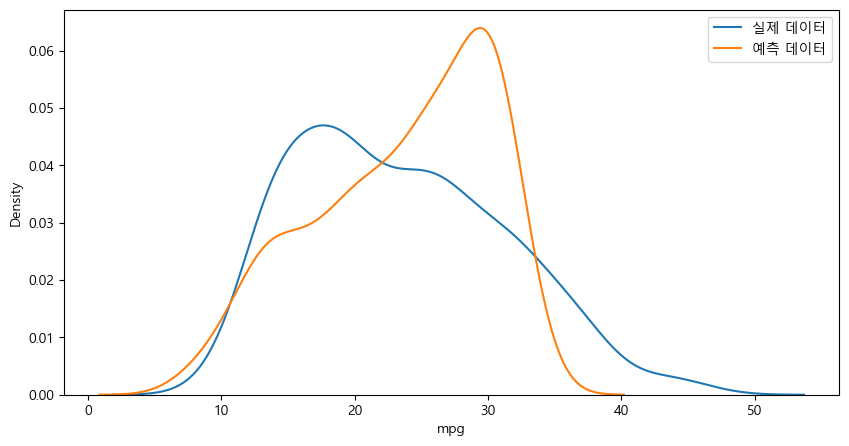

In [20]:
# 예측 결과와 실제 값을 비교(밀도 그래프 활용)

# 모형에 전체 x 데이터(weight)를 입력해 예측된 y(mpg) 변환
y_pre = lr.predict(x) # weight로 예측된 y(mpg)값

plt.figure(figsize = (10, 5))
plt.rcParams['font.family'] = 'Malgun Gothic' #폰트 설정(한글 깨짐 방지)


# 커널 밀도 함수 그래프
# .distplot(, hist = False)
ax1 = sns.kdeplot(y, label = '실제 데이터')
ax2 = sns.kdeplot(y_pre, label = '예측 데이터')
plt.legend()
plt.show()

# 실제 데이터 vs 예측 데이터
# 실제 값의 밀도는 외쪽으로 편향되어 있고 예측 값의 밀도는 오른쪽으로 편중되어 있다
# 즉, 독립변수(weight)와 종속변수(mpg) 사이에 선형관계는 있지만(결정계수)
# 정확한 예측을 위해서는 모형의 오차를 좀 더 줄여야 한다

## 다향 회귀분석

In [21]:
# 다향 회귀분석
# 훈련데이터, 검증 데이터 확인
print(f"훈련 데이터: {x_train.shape}") # 1열
print(f"검증 데이터: {x_test.shape}") # 1열

훈련 데이터: (274, 1)
검증 데이터: (118, 1)


In [25]:
# x_train 데이터를 2차항 회귀분석에 맞게 변환
# y = ax^2 + bx + c

from sklearn.preprocessing import PolynomialFeatures #다항식 변환

# 다항식 변환 함수로 2차항 객체 생성
poly = PolynomialFeatures(degree = 2) #2차항 적용

x_train_poly = poly.fit_transform(x_train) #x_train데이터를 2차항으로 변경

print(f"원본 데이터 : {x_train.shape}")
print(f"2차항 변환 데이터 : {x_train_poly.shape}") #3개의 열

원본 데이터 : (274, 1)
2차항 변환 데이터 : (274, 3)


In [28]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

# test data를 가지고 결정계수 계산
# x_test 데이터를 2차항으로 변경
x_test_poly = poly.transform(x_test)

# 결정계수 계산 : .score(검증데이터)
r_square = pr.score(x_test_poly, y_test)
print(r_square) #단순회귀보다 결정계수가 더 높다

0.7087009262975685


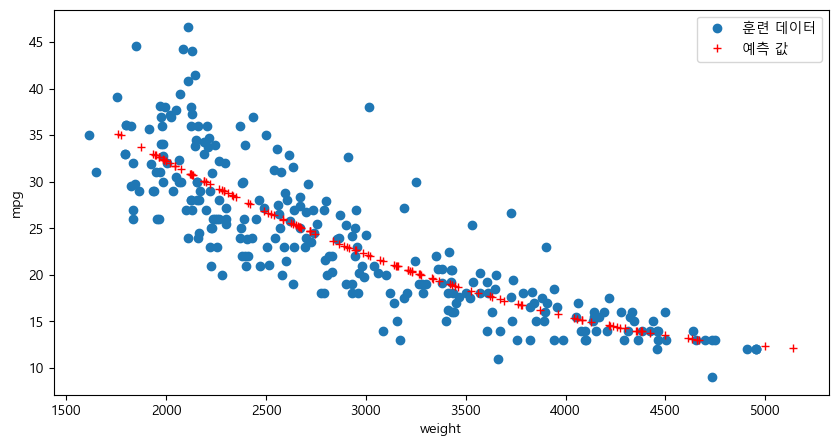

In [31]:
# 훈련 데이터의 분포와 학습된 모형의 회귀선을 그래프로 출력해서 비교
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력

y_pre_test = pr.predict(x_test_poly) #2차항 검증 데이터로 y(mpg)값 예측

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_train, y_train, 'o', label = '훈련 데이터')
ax.plot(x_test, y_pre_test, 'r+', label = '예측 값')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show() #결정계수가 높아진 것에서 확인한 것처럼 단순회기분석에 비해 데이터의 패턴을 더 잘 설명

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


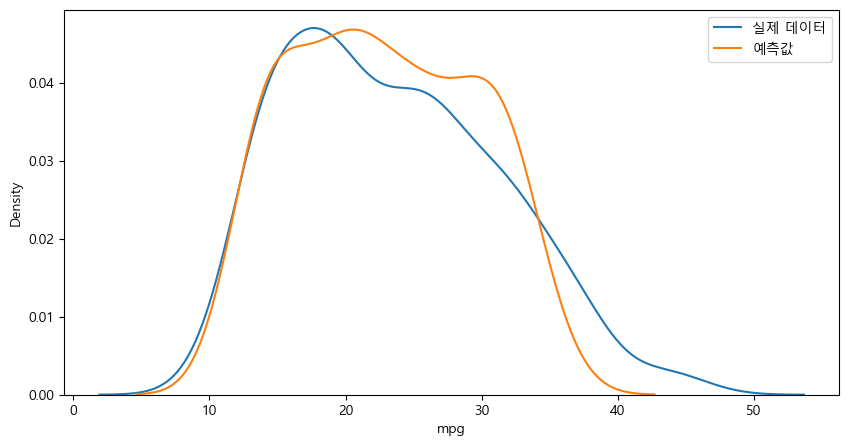

In [33]:
# 예측 결과와 실제 값을 밀도 그래프로 비교

plt.figure(figsize = (10, 5))
ax1 = sns.kdeplot(y, label = '실제 데이터')
ax2 = sns.kdeplot(y_pre_test, label = '예측값', ax = ax1)

plt.legend()
plt.show()

# 단순회귀분석의 결과보돠 오차가 훨씬 많이 줄어들었다.
# 따라서, 다항회귀분석이 더 적합한 모형

## 다중회귀분석

In [36]:
# 데이터 준비
print(ndf.head())
print("\n")

# 속성(변수) 선택
# 독립변수
x = ndf[['cylinders', 'horsepower', 'weight']]
y = ndf['mpg'] # 종속변수

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 10)
print(f"train data : {x_train.shape}")
print(f"test data : {x_test.shape}")

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0    3504
1  15.0          8       165.0    3693
2  18.0          8       150.0    3436
3  16.0          8       150.0    3433
4  17.0          8       140.0    3449


train data : (274, 3)
test data : (118, 3)


In [37]:
# 단순회귀분석 모형 만들기
from sklearn.linear_model import LinearRegression


# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# 훈련 데이터를 가지고 모형 학습
lr.fit(x_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
r_square = lr.score(x_test, y_test)
print(r_square, "\n")

# 독립변수의 계수, 상수항 출력
print(f"x변수의 계수: {lr.coef_}") # 독립변수 3개에 대한 계수 배열 형태
print(f"상수항: {lr.intercept_}")


0.6939048496695599 

x변수의 계수: [-0.60691288 -0.03714088 -0.00522268]
상수항: 46.41435126963403


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


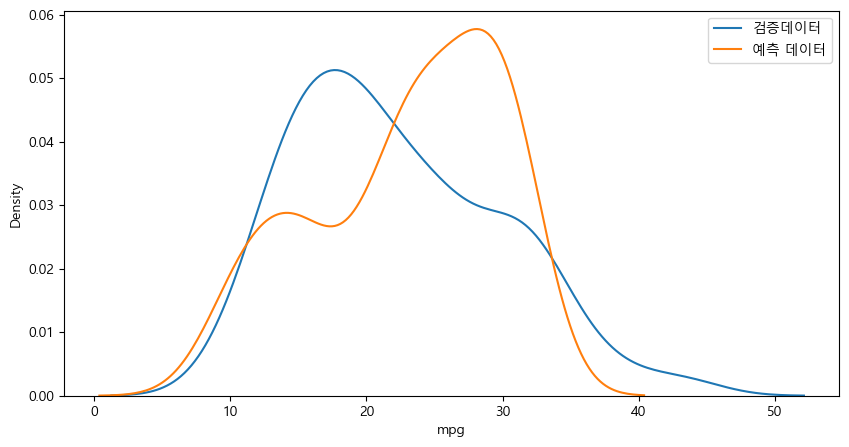

In [38]:
# 훈련 데이터의 밀도 와 검증 데이터로 예측한 회귀선을 그래프로 출력(밀도 그래프)

y_pre = lr.predict(x_test)

plt.figure(figsize = (10, 5))

ax1 = sns.kdeplot(y_test, label = '검증데이터')
ax2 = sns.kdeplot(y_pre, label = '예측 데이터')
plt.legend()
plt.show()